Importy

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

Wczytywanie danych

In [2]:
print("="*80)
print("WCZYTYWANIE DANYCH")
print("="*80)

# Główne datasety - KODY JAKO STRING!
df_complete = pd.read_csv('./output/complete_dataset.csv', dtype={'powiat_code': str})
df_ml_ready = pd.read_csv('./output/ml_ready_dataset.csv', dtype={'powiat_code': str})
df_2024 = pd.read_csv('./output/complete_dataset_2024.csv', dtype={'powiat_code': str})

# Szczegółowe datasety - KODY JAKO STRING!
df_crime_counts = pd.read_csv('./output/crime/crime_counts_powiaty.csv', dtype={'region_code': str})
df_crime_detection = pd.read_csv('./output/crime/crime_detection_rates_powiaty.csv', dtype={'region_code': str})
df_population = pd.read_csv('./output/population/population_with_density.csv', dtype={'powiat_code': str})
df_unemployment = pd.read_csv('./output/socio/unemployment_powiaty.csv', dtype={'powiat_code': str})
df_wages = pd.read_csv('./output/socio/wages_powiaty.csv', dtype={'powiat_code': str})

print(f"\n✓ Wczytano complete_dataset: {df_complete.shape}")
print(f"✓ Wczytano ml_ready_dataset: {df_ml_ready.shape}")
print(f"✓ Wczytano complete_dataset_2024: {df_2024.shape}")
print(f"✓ Wczytano crime_counts: {df_crime_counts.shape}")
print(f"✓ Wczytano crime_detection: {df_crime_detection.shape}")

WCZYTYWANIE DANYCH

✓ Wczytano complete_dataset: (4752, 29)
✓ Wczytano ml_ready_dataset: (3179, 29)
✓ Wczytano complete_dataset_2024: (396, 29)
✓ Wczytano crime_counts: (38016, 5)
✓ Wczytano crime_detection: (42768, 5)


Statystyki

In [3]:
print("\n" + "="*80)
print("PODSTAWOWE STATYSTYKI - COMPLETE DATASET")
print("="*80)

print("\n--- Informacje o datasecie ---")
print(f"Okres danych: {df_complete['year'].min()} - {df_complete['year'].max()}")
print(f"Liczba powiatów: {df_complete['powiat_code'].nunique()}")
print(f"Liczba lat: {df_complete['year'].nunique()}")
print(f"Całkowita liczba rekordów: {len(df_complete)}")
print(f"Braki danych: {df_complete.isnull().sum().sum()} ({df_complete.isnull().sum().sum() / df_complete.size * 100:.2f}%)")

print("\n--- Statystyki crime_rate_per_100k ---")
print(df_complete['crime_rate_per_100k'].describe())

print("\n--- Top 5 kolumn z brakami danych ---")
missing_cols = df_complete.isnull().sum().sort_values(ascending=False).head()
print(missing_cols[missing_cols > 0])

print("\n--- Rozkład danych po latach ---")
print(df_complete['year'].value_counts().sort_index())


PODSTAWOWE STATYSTYKI - COMPLETE DATASET

--- Informacje o datasecie ---
Okres danych: 2013 - 2024
Liczba powiatów: 396
Liczba lat: 12
Całkowita liczba rekordów: 4752
Braki danych: 11074 (8.04%)

--- Statystyki crime_rate_per_100k ---
count     4560.000000
mean      3292.438044
std       1669.614240
min        851.300000
25%       2323.575000
50%       2972.160000
75%       3839.130000
max      37248.580000
Name: crime_rate_per_100k, dtype: float64

--- Top 5 kolumn z brakami danych ---
wage_category            1142
wage_index               1140
unemployment_rate        1140
unemployment_category    1140
social_risk_score        1140
dtype: int64

--- Rozkład danych po latach ---
year
2013    396
2014    396
2015    396
2016    396
2017    396
2018    396
2019    396
2020    396
2021    396
2022    396
2023    396
2024    396
Name: count, dtype: int64


In [4]:
print("\n" + "="*80)
print("STATYSTYKI ML_READY DATASET (bez braków)")
print("="*80)

print(f"\nLiczba rekordów: {len(df_ml_ready)}")
print(f"Usunięto rekordów z brakami: {len(df_complete) - len(df_ml_ready)}")

print("\n--- Statystyki kluczowych features ---")
key_features = ['crime_rate_per_100k', 'population_density', 'unemployment_rate', 
                'wage_index', 'youth_ratio', 'gender_ratio']
print(df_ml_ready[key_features].describe())


STATYSTYKI ML_READY DATASET (bez braków)

Liczba rekordów: 3179
Usunięto rekordów z brakami: 1573

--- Statystyki kluczowych features ---
       crime_rate_per_100k  population_density  unemployment_rate  \
count          3179.000000         3179.000000        3179.000000   
mean           3121.189566          381.197763           8.671972   
std            1691.390495          666.081555           5.033246   
min             851.300000           17.930000           1.000000   
25%            2226.655000           59.790000           5.000000   
50%            2833.680000           97.290000           7.500000   
75%            3595.080000          212.580000          11.300000   
max           37248.580000         3961.080000          34.400000   

        wage_index  youth_ratio  gender_ratio  
count  3179.000000  3179.000000   3179.000000  
mean     86.139509     0.173687     95.578795  
std      10.900648     0.022549      3.455629  
min       0.000000     0.115200     83.500000  

Trendy czasowe

In [5]:
print("\n" + "="*80)
print("TRENDY CZASOWE - PRZESTĘPCZOŚĆ W POLSCE")
print("="*80)

# Agregacja danych rocznych dla całej Polski
yearly_stats = df_complete.groupby('year').agg({
    'crime_rate_per_100k': 'mean',
    'total_crimes': 'sum',
    'total_population': 'sum',
    'unemployment_rate': 'mean',
    'wage_index': 'mean'
}).reset_index()

print("\n--- Średni wskaźnik przestępczości w Polsce (rok po roku) ---")
print(yearly_stats[['year', 'crime_rate_per_100k', 'total_crimes']])

# Obliczenie zmian rok do roku
yearly_stats['crime_change_pct'] = yearly_stats['crime_rate_per_100k'].pct_change() * 100
yearly_stats['unemployment_change_pct'] = yearly_stats['unemployment_rate'].pct_change() * 100

print("\n--- Procentowe zmiany rok do roku ---")
print(yearly_stats[['year', 'crime_change_pct', 'unemployment_change_pct']].dropna())


TRENDY CZASOWE - PRZESTĘPCZOŚĆ W POLSCE

--- Średni wskaźnik przestępczości w Polsce (rok po roku) ---
    year  crime_rate_per_100k  total_crimes
0   2013          4332.268368     3680852.0
1   2014          3436.289921     2970496.0
2   2015          3181.244132     2724804.0
3   2016          2956.643579     2528936.0
4   2017          2957.256947     2512130.0
5   2018          3096.006895     2595094.0
6   2019          3188.265447     2709252.0
7   2020          3218.004316     2570476.0
8   2021          3360.656658     2771642.0
9   2022          3495.150868     2850072.0
10  2023          3210.198421     2646452.0
11  2024          3077.270974     2483968.0

--- Procentowe zmiany rok do roku ---
    year  crime_change_pct  unemployment_change_pct
1   2014        -20.681508               -14.124153
2   2015         -7.422127               -13.089474
3   2016         -7.060148               -14.562268
4   2017          0.020745               -18.524435
5   2018          4.69184

Wykres trendy polski

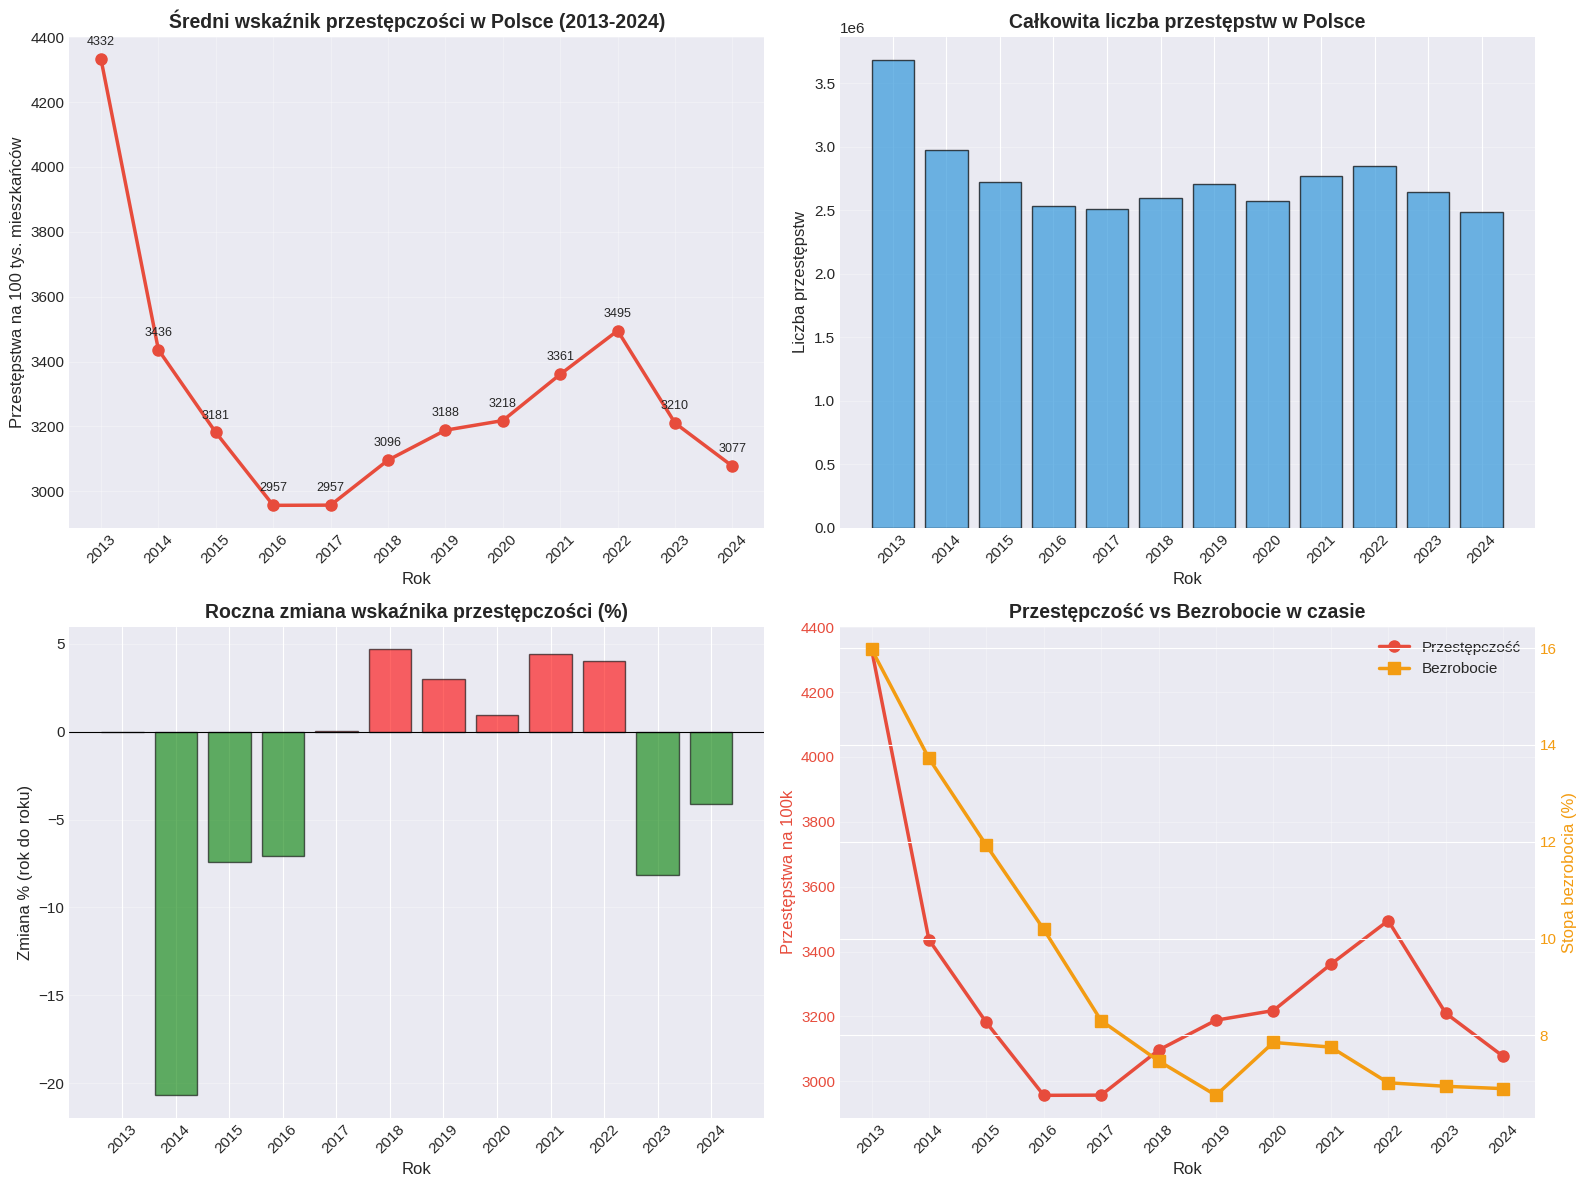


✓ Wykres zapisany jako 'trendy_czasowe_polska.png'


In [6]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Wykres 1: Średni wskaźnik przestępczości w Polsce
ax1 = axes[0, 0]
ax1.plot(yearly_stats['year'], yearly_stats['crime_rate_per_100k'], 
         marker='o', linewidth=2.5, markersize=8, color='#e74c3c')
ax1.set_title('Średni wskaźnik przestępczości w Polsce (2013-2024)', 
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Rok', fontsize=12)
ax1.set_ylabel('Przestępstwa na 100 tys. mieszkańców', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(yearly_stats['year'])
ax1.set_xticklabels(yearly_stats['year'], rotation=45)

# Dodanie wartości na wykresie
for x, y in zip(yearly_stats['year'], yearly_stats['crime_rate_per_100k']):
    ax1.annotate(f'{y:.0f}', (x, y), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

# Wykres 2: Całkowita liczba przestępstw
ax2 = axes[0, 1]
ax2.bar(yearly_stats['year'], yearly_stats['total_crimes'], 
        color='#3498db', alpha=0.7, edgecolor='black')
ax2.set_title('Całkowita liczba przestępstw w Polsce', 
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Rok', fontsize=12)
ax2.set_ylabel('Liczba przestępstw', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xticks(yearly_stats['year'])
ax2.set_xticklabels(yearly_stats['year'], rotation=45)

# Wykres 3: Procentowa zmiana rok do roku
ax3 = axes[1, 0]
colors = ['green' if x < 0 else 'red' for x in yearly_stats['crime_change_pct'].fillna(0)]
ax3.bar(yearly_stats['year'], yearly_stats['crime_change_pct'].fillna(0), 
        color=colors, alpha=0.6, edgecolor='black')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax3.set_title('Roczna zmiana wskaźnika przestępczości (%)', 
              fontsize=14, fontweight='bold')
ax3.set_xlabel('Rok', fontsize=12)
ax3.set_ylabel('Zmiana % (rok do roku)', fontsize=12)
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_xticks(yearly_stats['year'])
ax3.set_xticklabels(yearly_stats['year'], rotation=45)

# Wykres 4: Przestępczość vs Bezrobocie
ax4 = axes[1, 1]
ax4_twin = ax4.twinx()

line1 = ax4.plot(yearly_stats['year'], yearly_stats['crime_rate_per_100k'], 
                 marker='o', linewidth=2.5, markersize=8, color='#e74c3c', label='Przestępczość')
line2 = ax4_twin.plot(yearly_stats['year'], yearly_stats['unemployment_rate'], 
                      marker='s', linewidth=2.5, markersize=8, color='#f39c12', label='Bezrobocie')

ax4.set_title('Przestępczość vs Bezrobocie w czasie', 
              fontsize=14, fontweight='bold')
ax4.set_xlabel('Rok', fontsize=12)
ax4.set_ylabel('Przestępstwa na 100k', fontsize=12, color='#e74c3c')
ax4_twin.set_ylabel('Stopa bezrobocia (%)', fontsize=12, color='#f39c12')
ax4.tick_params(axis='y', labelcolor='#e74c3c')
ax4_twin.tick_params(axis='y', labelcolor='#f39c12')
ax4.grid(True, alpha=0.3)
ax4.set_xticks(yearly_stats['year'])
ax4.set_xticklabels(yearly_stats['year'], rotation=45)

# Legenda
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax4.legend(lines, labels, loc='upper right')

plt.tight_layout()
plt.savefig('./output/imgs/trendy_czasowe_polska.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Wykres zapisany jako 'trendy_czasowe_polska.png'")

TOP 5 najniebezpieczniejszych / najbezpieczniejszych

In [7]:
print("\n" + "="*80)
print("TRENDY PO WOJEWÓDZTWACH")
print("="*80)

# Ekstrakcja województwa z nazwy powiatu (pierwsze 2 znaki kodu TERYT)
df_complete["wojewodztwo_code"] = df_complete["powiat_code"].astype(str).str.zfill(7).str[:2]

# Mapowanie kodów województw na nazwy
wojewodztwa_map = {
    '02': 'dolnośląskie', '04': 'kujawsko-pomorskie', '06': 'lubelskie',
    '08': 'lubuskie', '10': 'łódzkie', '12': 'małopolskie',
    '14': 'mazowieckie', '16': 'opolskie', '18': 'podkarpackie',
    '20': 'podlaskie', '22': 'pomorskie', '24': 'śląskie',
    '26': 'świętokrzyskie', '28': 'warmińsko-mazurskie', '30': 'wielkopolskie',
    '32': 'zachodniopomorskie'
}

df_complete['wojewodztwo'] = df_complete['wojewodztwo_code'].map(wojewodztwa_map)

# Filtruj tylko powiaty (wykluczamy województwa które kończą się na 00000)
df_only_powiaty = df_complete[df_complete['powiat_code'].astype(str).str.endswith('00000') == False].copy()

# Grupuj i oblicz wskaźnik przestępczości
wojewodztwa_yearly = df_only_powiaty.groupby(['wojewodztwo', 'year']).apply(
    lambda x: pd.Series({
        'crime_rate_per_100k': (x['total_crimes'].sum() / x['total_population'].sum() * 100000)
    }), include_groups=False
).reset_index()

# Filtruj 2024
wojewodztwa_2024 = wojewodztwa_yearly[wojewodztwa_yearly['year'] == 2024].sort_values(
    'crime_rate_per_100k', ascending=False
)

print("\n--- TOP 5 Województw z najwyższą przestępczością (2024) ---")
print(wojewodztwa_2024.head().to_string(index=False))

print("\n--- TOP 5 Województw z najniższą przestępczością (2024) ---")
print(wojewodztwa_2024.tail().to_string(index=False))

print("\n--- Wszystkie wojewodztwa ---")
print(wojewodztwa_2024)


TRENDY PO WOJEWÓDZTWACH

--- TOP 5 Województw z najwyższą przestępczością (2024) ---
 wojewodztwo  year  crime_rate_per_100k
dolnośląskie  2024          4309.538735
    lubuskie  2024          3982.805039
     śląskie  2024          3833.304477
   pomorskie  2024          3685.198473
 mazowieckie  2024          3557.635156

--- TOP 5 Województw z najniższą przestępczością (2024) ---
   wojewodztwo  year  crime_rate_per_100k
      opolskie  2024          2807.493529
świętokrzyskie  2024          2541.211460
     lubelskie  2024          2540.171505
     podlaskie  2024          2418.859992
  podkarpackie  2024          1995.349484

--- Wszystkie wojewodztwa ---
             wojewodztwo  year  crime_rate_per_100k
11          dolnośląskie  2024          4309.538735
47              lubuskie  2024          3982.805039
179              śląskie  2024          3833.304477
119            pomorskie  2024          3685.198473
59           mazowieckie  2024          3557.635156
71           małop

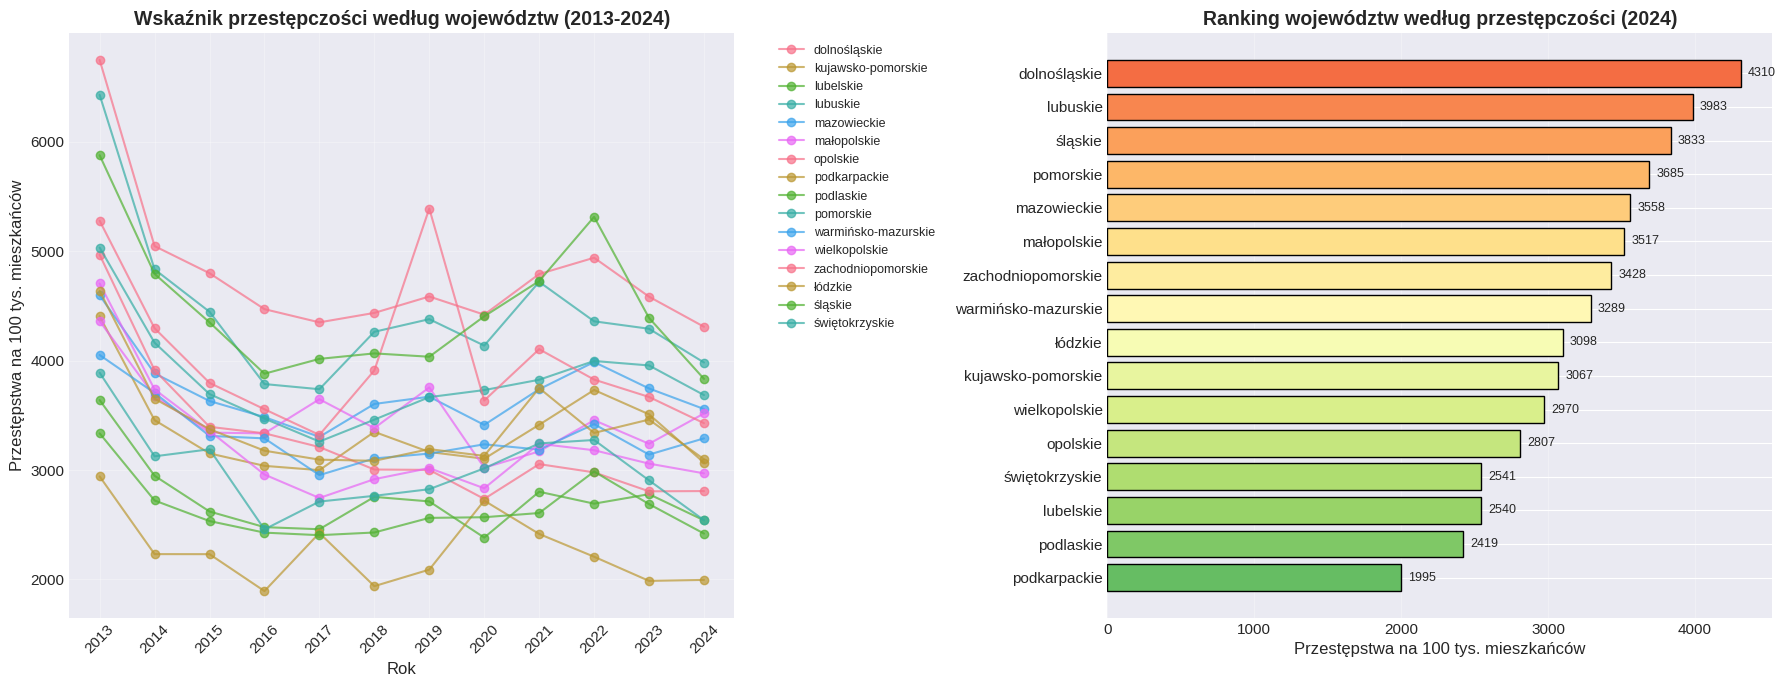


✓ Wykres zapisany jako 'trendy_wojewodztwa.png'


In [8]:
# Wykres liniowy - wszystkie województwa
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

ax1 = axes[0]
for woj in wojewodztwa_yearly['wojewodztwo'].unique():
    if pd.notna(woj):
        woj_data = wojewodztwa_yearly[wojewodztwa_yearly['wojewodztwo'] == woj]
        ax1.plot(woj_data['year'], woj_data['crime_rate_per_100k'], 
                marker='o', linewidth=1.5, label=woj, alpha=0.7)

ax1.set_title('Wskaźnik przestępczości według województw (2013-2024)', 
             fontsize=14, fontweight='bold')
ax1.set_xlabel('Rok', fontsize=12)
ax1.set_ylabel('Przestępstwa na 100 tys. mieszkańców', fontsize=12)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(wojewodztwa_yearly['year'].unique())
ax1.set_xticklabels(wojewodztwa_yearly['year'].unique(), rotation=45)

# Wykres słupkowy - ranking 2024
ax2 = axes[1]
wojewodztwa_2024_sorted = wojewodztwa_2024.sort_values('crime_rate_per_100k')
colors_woj = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(wojewodztwa_2024_sorted)))

ax2.barh(wojewodztwa_2024_sorted['wojewodztwo'], 
        wojewodztwa_2024_sorted['crime_rate_per_100k'],
        color=colors_woj, edgecolor='black')
ax2.set_title('Ranking województw według przestępczości (2024)', 
             fontsize=14, fontweight='bold')
ax2.set_xlabel('Przestępstwa na 100 tys. mieszkańców', fontsize=12)
ax2.grid(True, alpha=0.3, axis='x')

# Dodanie wartości na wykresie
for i, (woj, val) in enumerate(zip(wojewodztwa_2024_sorted['wojewodztwo'], 
                                    wojewodztwa_2024_sorted['crime_rate_per_100k'])):
    ax2.text(val + 50, i, f'{val:.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('./output/imgs/trendy_wojewodztwa.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Wykres zapisany jako 'trendy_wojewodztwa.png'")

In [9]:
print("\n" + "="*80)
print("PODSUMOWANIE ANALIZY TRENDÓW CZASOWYCH")
print("="*80)

# Ogólny trend
first_year = yearly_stats.iloc[0]
last_year = yearly_stats.iloc[-1]
total_change = ((last_year['crime_rate_per_100k'] - first_year['crime_rate_per_100k']) / 
                first_year['crime_rate_per_100k'] * 100)

print(f"\n📊 POLSKA OGÓŁEM:")
print(f"   Wskaźnik przestępczości {int(first_year['year'])}: {first_year['crime_rate_per_100k']:.0f}")
print(f"   Wskaźnik przestępczości {int(last_year['year'])}: {last_year['crime_rate_per_100k']:.0f}")
print(f"   Zmiana całkowita: {total_change:+.1f}%")

# Rok z najwyższą i najniższą przestępczością
max_crime_year = yearly_stats.loc[yearly_stats['crime_rate_per_100k'].idxmax()]
min_crime_year = yearly_stats.loc[yearly_stats['crime_rate_per_100k'].idxmin()]

print(f"\n   Rok z najwyższą przestępczością: {int(max_crime_year['year'])} ({max_crime_year['crime_rate_per_100k']:.0f})")
print(f"   Rok z najniższą przestępczością: {int(min_crime_year['year'])} ({min_crime_year['crime_rate_per_100k']:.0f})")

# Trend bezrobocia
unemployment_change = ((last_year['unemployment_rate'] - first_year['unemployment_rate']) / 
                      first_year['unemployment_rate'] * 100)
print(f"\n📉 BEZROBOCIE:")
print(f"   Stopa bezrobocia {int(first_year['year'])}: {first_year['unemployment_rate']:.1f}%")
print(f"   Stopa bezrobocia {int(last_year['year'])}: {last_year['unemployment_rate']:.1f}%")
print(f"   Zmiana: {unemployment_change:+.1f}%")

print("\n" + "="*80)
print("CZĘŚĆ 1 ZAKOŃCZONA - Trendy czasowe")
print("="*80)


PODSUMOWANIE ANALIZY TRENDÓW CZASOWYCH

📊 POLSKA OGÓŁEM:
   Wskaźnik przestępczości 2013: 4332
   Wskaźnik przestępczości 2024: 3077
   Zmiana całkowita: -29.0%

   Rok z najwyższą przestępczością: 2013 (4332)
   Rok z najniższą przestępczością: 2016 (2957)

📉 BEZROBOCIE:
   Stopa bezrobocia 2013: 16.0%
   Stopa bezrobocia 2024: 6.9%
   Zmiana: -56.8%

CZĘŚĆ 1 ZAKOŃCZONA - Trendy czasowe


In [10]:
# Target variable
target = 'crime_rate_per_100k'

# Features do analizy
features_numeric = [
    'population_density',          # Gęstość zaludnienia
    'unemployment_rate',           # Bezrobocie
    'wage_index',                  # Wynagrodzenia
    'youth_ratio',                 # Udział młodzieży 15-29
    'middle_age_ratio',            # Udział 30-49 lat
    'elderly_ratio',               # Udział 50-69 lat
    'gender_ratio',                # Mężczyźni na 100 kobiet
    'population_change_pct',       # Zmiana populacji r/r
    'total_population'             # Całkowita populacja
]

# Tworzenie DataFrame tylko z wybranymi kolumnami
df_corr = df_ml_ready[[target] + features_numeric].copy()

print("\n--- Zmienne do analizy korelacji ---")
for i, col in enumerate([target] + features_numeric, 1):
    print(f"{i}. {col}")


--- Zmienne do analizy korelacji ---
1. crime_rate_per_100k
2. population_density
3. unemployment_rate
4. wage_index
5. youth_ratio
6. middle_age_ratio
7. elderly_ratio
8. gender_ratio
9. population_change_pct
10. total_population


In [11]:
print("\n" + "="*80)
print("MACIERZ KORELACJI")
print("="*80)

# Obliczenie macierzy korelacji Pearsona
correlation_matrix = df_corr.corr()

# Korelacje z crime_rate_per_100k
correlations_with_target = correlation_matrix[target].sort_values(ascending=False)

print("\n--- Korelacje z wskaźnikiem przestępczości ---")
print(correlations_with_target)

# Najsilniejsze korelacje (absolutne wartości)
print("\n--- TOP 5 najsilniejszych korelacji (|r|) ---")
abs_correlations = correlations_with_target.abs().sort_values(ascending=False)
print(abs_correlations.head(6)[1:])  # Pomijamy samą zmienną target


MACIERZ KORELACJI

--- Korelacje z wskaźnikiem przestępczości ---
crime_rate_per_100k      1.000000
population_density       0.420302
wage_index               0.269575
elderly_ratio            0.199952
middle_age_ratio         0.175291
total_population         0.150777
population_change_pct   -0.074883
unemployment_rate       -0.154331
youth_ratio             -0.290256
gender_ratio            -0.423999
Name: crime_rate_per_100k, dtype: float64

--- TOP 5 najsilniejszych korelacji (|r|) ---
gender_ratio          0.423999
population_density    0.420302
youth_ratio           0.290256
wage_index            0.269575
elderly_ratio         0.199952
Name: crime_rate_per_100k, dtype: float64


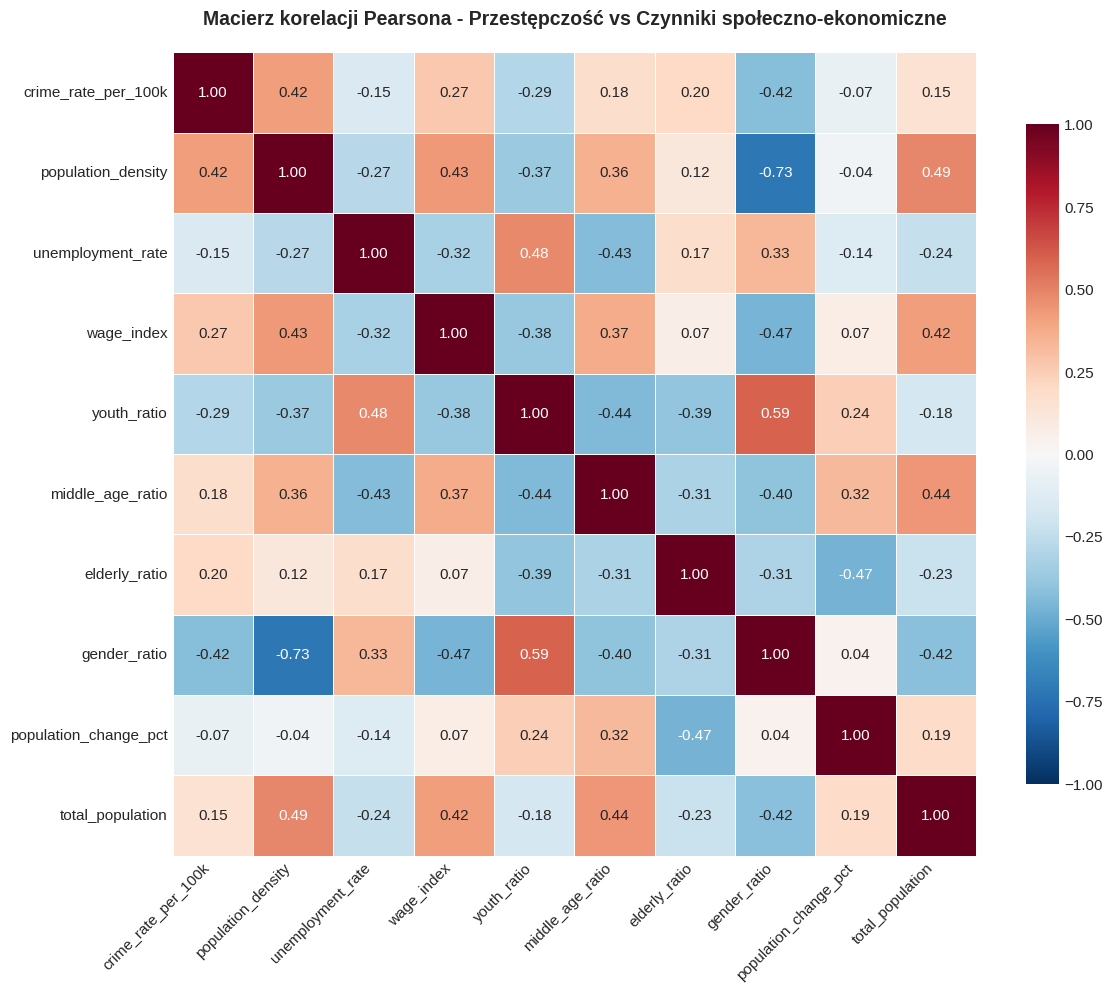


✓ Heatmapa zapisana jako 'korelacje_heatmapa.png'


In [12]:
fig, ax = plt.subplots(figsize=(12, 10))

# Tworzenie heatmapy
sns.heatmap(correlation_matrix, 
            annot=True,           # Pokazuj wartości
            fmt='.2f',            # Format liczb
            cmap='RdBu_r',        # Kolory: czerwony (dodatnia) - biały - niebieski (ujemna)
            center=0,             # Środek skali na 0
            square=True,          # Kwadratowe komórki
            linewidths=0.5,       # Linie między komórkami
            cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1,      # Zakres od -1 do 1
            ax=ax)

ax.set_title('Macierz korelacji Pearsona - Przestępczość vs Czynniki społeczno-ekonomiczne', 
             fontsize=14, fontweight='bold', pad=20)

# Rotacja etykiet
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('./output/imgs/korelacje_heatmapa.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Heatmapa zapisana jako 'korelacje_heatmapa.png'")


SCATTER PLOTS - WIZUALIZACJA ZALEŻNOŚCI


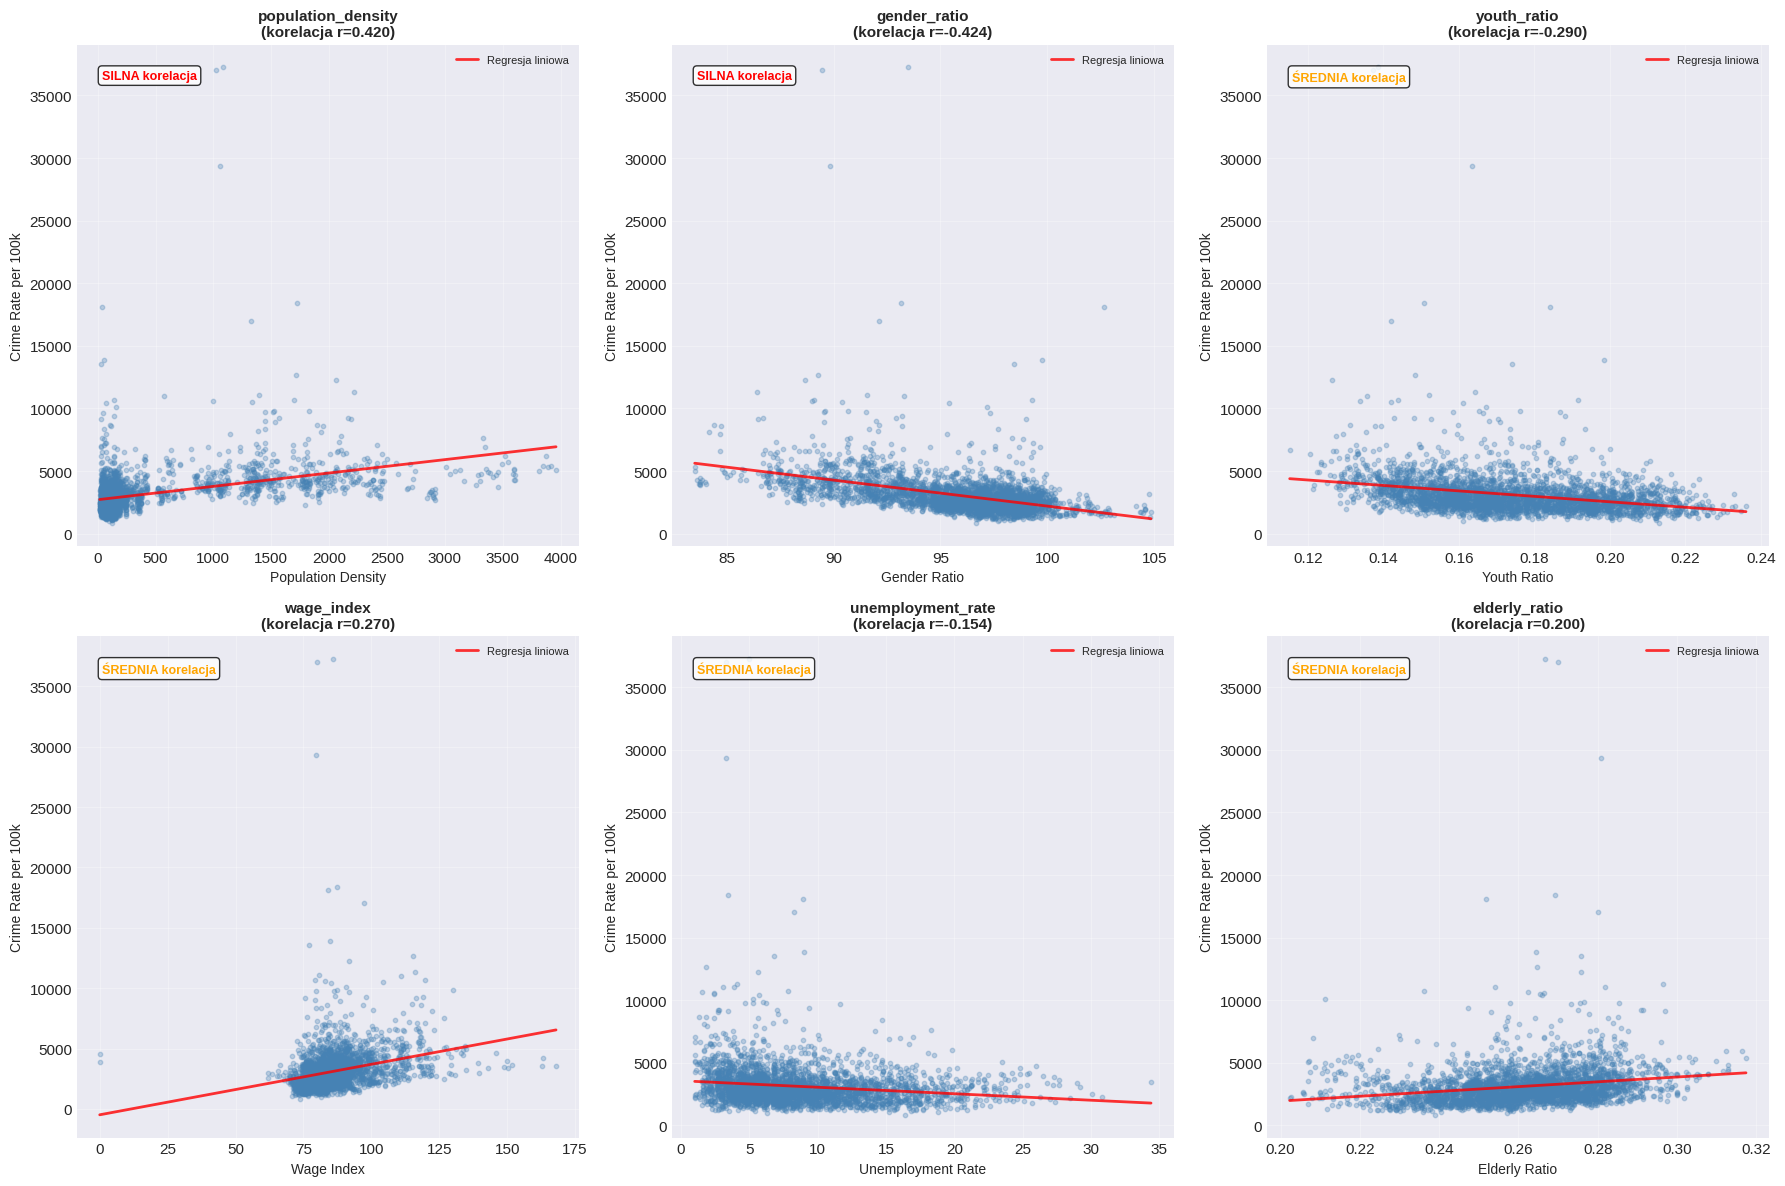


✓ Scatter plots zapisane jako 'korelacje_scatter_plots.png'


In [13]:
print("\n" + "="*80)
print("SCATTER PLOTS - WIZUALIZACJA ZALEŻNOŚCI")
print("="*80)

# Wybieramy 6 najważniejszych features do wizualizacji
top_features = [
    'population_density',
    'gender_ratio',
    'youth_ratio',
    'wage_index',
    'unemployment_rate',
    'elderly_ratio'
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    ax = axes[idx]
    
    # Scatter plot
    ax.scatter(df_ml_ready[feature], df_ml_ready[target], alpha=0.3, s=10, color='steelblue')
    
    # Linia regresji
    z = np.polyfit(df_ml_ready[feature].dropna(), df_ml_ready[df_ml_ready[feature].notna()][target], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df_ml_ready[feature].min(), df_ml_ready[feature].max(), 100)
    ax.plot(x_line, p(x_line), "r-", linewidth=2, alpha=0.8, label='Regresja liniowa')
    
    # Korelacja
    corr = correlation_matrix.loc[target, feature]
    
    # Tytuł i etykiety
    ax.set_title(f'{feature}\n(korelacja r={corr:.3f})', 
                fontsize=11, fontweight='bold')
    ax.set_xlabel(feature.replace('_', ' ').title(), fontsize=10)
    ax.set_ylabel('Crime Rate per 100k', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)
    
    # Dodanie tekstu z interpretacją
    if abs(corr) > 0.3:
        strength = "SILNA"
        color = 'red'
    elif abs(corr) > 0.15:
        strength = "ŚREDNIA"
        color = 'orange'
    else:
        strength = "SŁABA"
        color = 'gray'
    
    ax.text(0.05, 0.95, f'{strength} korelacja', 
           transform=ax.transAxes, fontsize=9, 
           verticalalignment='top', color=color, fontweight='bold',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('./output/imgs/korelacje_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Scatter plots zapisane jako 'korelacje_scatter_plots.png'")

In [14]:
print("\n" + "="*80)
print("ANALIZA PARADOKSÓW I NIEINTUICYJNYCH ZALEŻNOŚCI")
print("="*80)

# Paradoks 1: Ujemna korelacja bezrobocia
print("\n🔍 PARADOKS 1: Bezrobocie vs Przestępczość")
print(f"   Korelacja: {correlation_matrix.loc[target, 'unemployment_rate']:.3f}")
print("   ⚠️  Intuicja: wyższe bezrobocie → więcej przestępstw")
print("   📊 Rzeczywistość: UJEMNA korelacja!")
print("\n   Możliwe wyjaśnienia:")
print("   - Miasta: niskie bezrobocie + wysoka przestępczość (więcej okazji)")
print("   - Wieś: wysokie bezrobocie + niska przestępczość (mniejsza gęstość)")
print("   - Confounding przez urbanizację")

# Sprawdzamy to przez podział na kategorie urbanizacji
if 'urbanization_category' in df_ml_ready.columns:
    urban_analysis = df_ml_ready.groupby('urbanization_category').agg({
        'crime_rate_per_100k': 'mean',
        'unemployment_rate': 'mean',
        'population_density': 'mean'
    }).round(1)
    print("\n   Średnie wartości według kategorii urbanizacji:")
    print(urban_analysis)

# Paradoks 2: Gender ratio
print("\n🔍 PARADOKS 2: Gender Ratio vs Przestępczość")
print(f"   Korelacja: {correlation_matrix.loc[target, 'gender_ratio']:.3f}")
print("   📊 Ujemna korelacja: więcej kobiet = więcej przestępstw?")
print("\n   Możliwe wyjaśnienia:")
print("   - Miasta mają więcej kobiet (migracja mężczyzn w poszukiwaniu pracy)")
print("   - Przestępczość wyższa w miastach z innych powodów")
print("   - To też efekt urbanizacji, nie gender per se")

# Paradoks 3: Youth ratio
print("\n🔍 PARADOKS 3: Udział Młodzieży vs Przestępczość")
print(f"   Korelacja: {correlation_matrix.loc[target, 'youth_ratio']:.3f}")
print("   ⚠️  Intuicja: więcej młodzieży → więcej przestępstw")
print("   📊 Rzeczywistość: UJEMNA korelacja!")
print("\n   Możliwe wyjaśnienia:")
print("   - Młodzież migruje do miast (więc wieś ma więcej młodzieży proporcjonalnie?)")
print("   - Miasta mają starzejącą się populację ale więcej przestępstw")
print("   - Potrzebna głębsza analiza")


ANALIZA PARADOKSÓW I NIEINTUICYJNYCH ZALEŻNOŚCI

🔍 PARADOKS 1: Bezrobocie vs Przestępczość
   Korelacja: -0.154
   ⚠️  Intuicja: wyższe bezrobocie → więcej przestępstw
   📊 Rzeczywistość: UJEMNA korelacja!

   Możliwe wyjaśnienia:
   - Miasta: niskie bezrobocie + wysoka przestępczość (więcej okazji)
   - Wieś: wysokie bezrobocie + niska przestępczość (mniejsza gęstość)
   - Confounding przez urbanizację

   Średnie wartości według kategorii urbanizacji:
                       crime_rate_per_100k  unemployment_rate  \
urbanization_category                                           
metro                               4906.0                5.8   
rural                               2685.1               10.4   
suburban                            2820.6                7.8   
urban                               3743.7                5.5   

                       population_density  
urbanization_category                      
metro                              1826.5  
rural             

In [17]:
print("\n" + "="*80)
print("TESTY STATYSTYCZNE - ISTOTNOŚĆ KORELACJI")
print("="*80)

print("\n--- Test istotności korelacji (p-value < 0.05 = istotna) ---")

for feature in top_features:
    # Test korelacji Pearsona
    corr_coef, p_value = stats.pearsonr(df_ml_ready[feature].dropna(), 
                                         df_ml_ready[df_ml_ready[feature].notna()][target])
    
    significance = "✓ ISTOTNA" if p_value < 0.05 else "✗ nieistotna"
    stars = ""
    if p_value < 0.001:
        stars = "***"
    elif p_value < 0.01:
        stars = "**"
    elif p_value < 0.05:
        stars = "*"
    
    print(f"\n{feature}:")
    print(f"   r = {corr_coef:+.3f}  |  p-value = {p_value:.6f}  {stars}  |  {significance}")

print("\n* p < 0.05,  ** p < 0.01,  *** p < 0.001")


TESTY STATYSTYCZNE - ISTOTNOŚĆ KORELACJI

--- Test istotności korelacji (p-value < 0.05 = istotna) ---

population_density:
   r = +0.420  |  p-value = 0.000000  ***  |  ✓ ISTOTNA

gender_ratio:
   r = -0.424  |  p-value = 0.000000  ***  |  ✓ ISTOTNA

youth_ratio:
   r = -0.290  |  p-value = 0.000000  ***  |  ✓ ISTOTNA

wage_index:
   r = +0.270  |  p-value = 0.000000  ***  |  ✓ ISTOTNA

unemployment_rate:
   r = -0.154  |  p-value = 0.000000  ***  |  ✓ ISTOTNA

elderly_ratio:
   r = +0.200  |  p-value = 0.000000  ***  |  ✓ ISTOTNA

* p < 0.05,  ** p < 0.01,  *** p < 0.001



ANALIZA PRZESTĘPCZOŚCI WEDŁUG KATEGORII

--- Statystyki: urbanization_category ---
                         mean  median  count
urbanization_category                       
metro                  4906.0  4284.2    471
rural                  2685.1  2537.5   1620
suburban               2820.6  2723.6    879
urban                  3743.7  3521.7    209

--- Statystyki: unemployment_category ---
                         mean  median  count
unemployment_category                       
high                   2789.3  2628.9    385
low                    3077.7  2806.1   1363
medium                 2815.8  2684.3    612
very_low               3577.8  3098.1    819

--- Statystyki: wage_category ---
                 mean  median  count
wage_category                       
high           4260.5  3853.8    280
low            2642.6  2435.0    825
medium_high    3602.4  3417.7    456
medium_low     3031.0  2772.3   1616

--- Statystyki: population_size_category ---
                            me

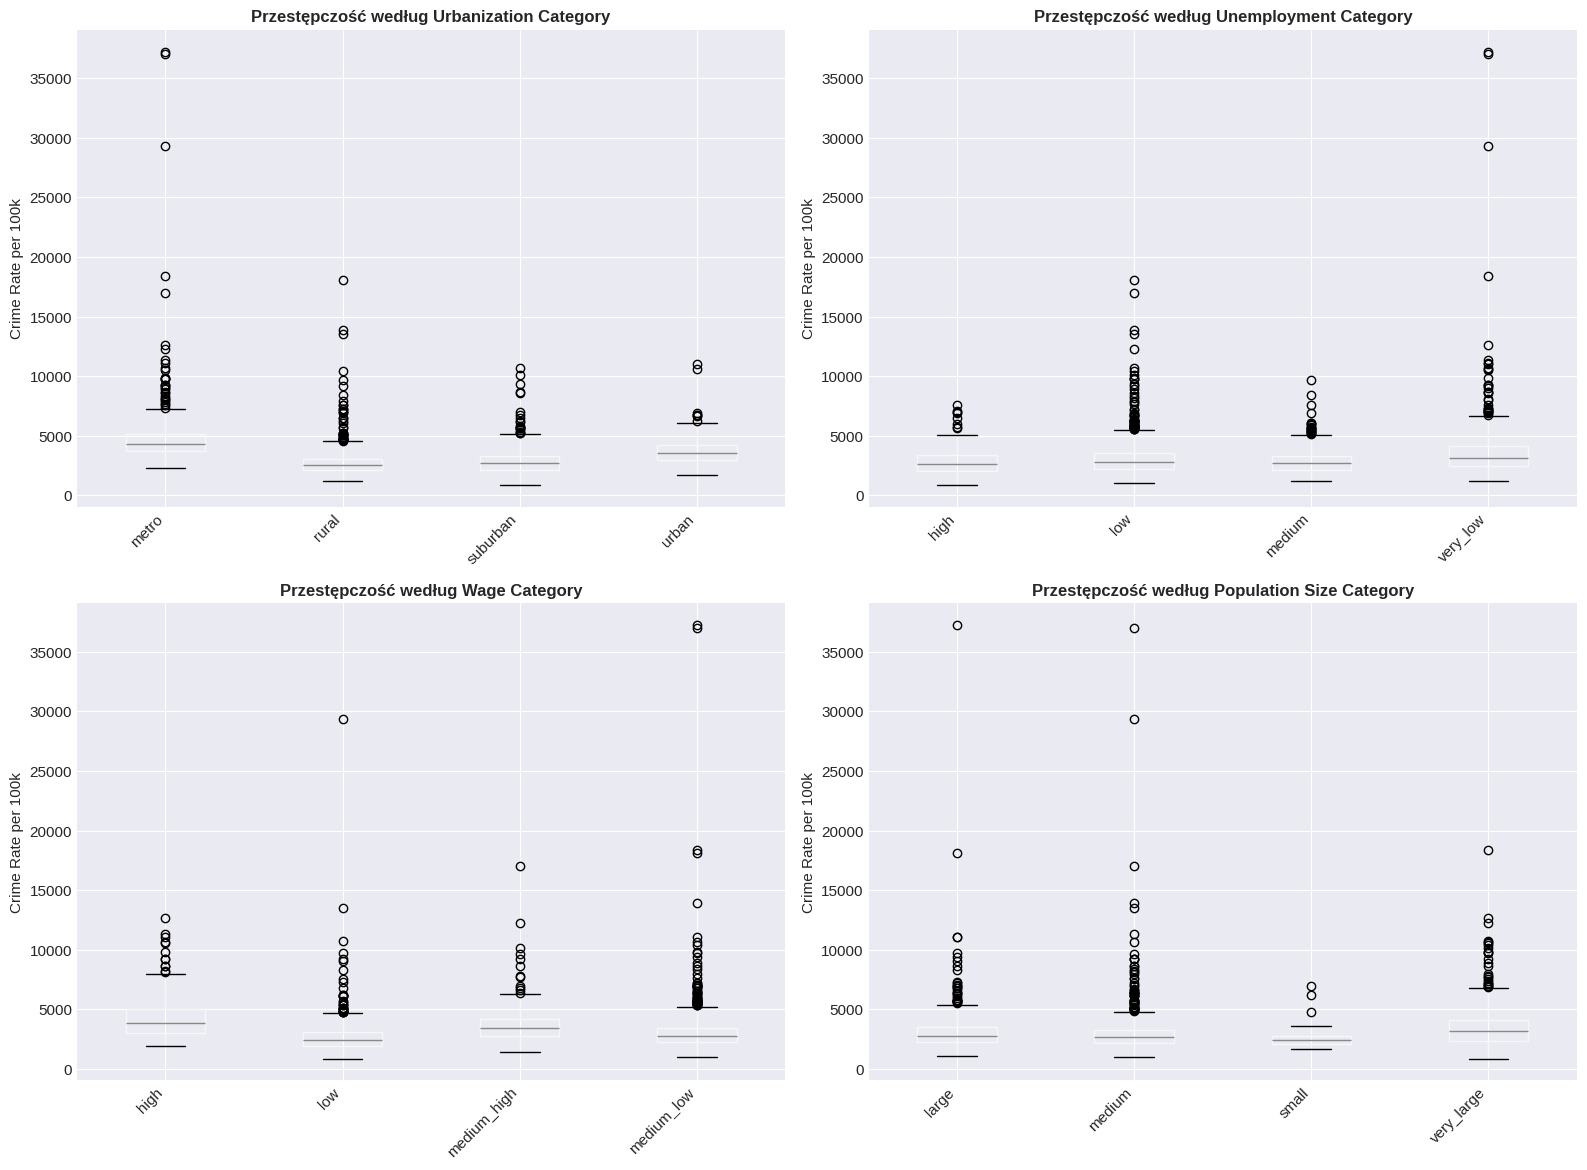


✓ Box plots zapisane jako 'korelacje_kategorie_boxplots.png'


In [18]:
print("\n" + "="*80)
print("ANALIZA PRZESTĘPCZOŚCI WEDŁUG KATEGORII")
print("="*80)

# Jeśli mamy kategorie w datasecie
categorical_vars = ['urbanization_category', 'unemployment_category', 
                    'wage_category', 'population_size_category']

existing_cats = [cat for cat in categorical_vars if cat in df_ml_ready.columns]

if existing_cats:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for idx, cat_var in enumerate(existing_cats[:4]):
        ax = axes[idx]
        
        # Box plot
        df_sorted = df_ml_ready.sort_values(cat_var)
        df_sorted.boxplot(column='crime_rate_per_100k', by=cat_var, ax=ax)
        
        ax.set_title(f'Przestępczość według {cat_var.replace("_", " ").title()}', 
                    fontsize=12, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('Crime Rate per 100k', fontsize=11)
        plt.sca(ax)
        plt.xticks(rotation=45, ha='right')
        
        # Statystyki
        stats_by_cat = df_ml_ready.groupby(cat_var)['crime_rate_per_100k'].agg(['mean', 'median', 'count'])
        print(f"\n--- Statystyki: {cat_var} ---")
        print(stats_by_cat.round(1))
    
    plt.suptitle('')  # Usuń domyślny tytuł
    plt.tight_layout()
    plt.savefig('./output/imgs/korelacje_kategorie_boxplots.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Box plots zapisane jako 'korelacje_kategorie_boxplots.png'")

In [ ]:
print("\n" + "="*80)
print("RANKING NAJSILNIEJSZYCH PREDYKTORÓW PRZESTĘPCZOŚCI")
print("="*80)

# Ranking według absolutnej wartości korelacji
predictor_ranking = abs_correlations[1:].sort_values(ascending=False)

print("\n🏆 TOP predyktory (według |r|):\n")
for rank, (feature, corr_abs) in enumerate(predictor_ranking.items(), 1):
    corr_actual = correlations_with_target[feature]
    direction = "↑ dodatnia" if corr_actual > 0 else "↓ ujemna"
    
    # Ocena siły
    if corr_abs > 0.4:
        strength = "BARDZO SILNA"
    elif corr_abs > 0.3:
        strength = "SILNA"
    elif corr_abs > 0.2:
        strength = "ŚREDNIA"
    elif corr_abs > 0.1:
        strength = "SŁABA"
    else:
        strength = "BARDZO SŁABA"
    
    print(f"{rank}. {feature:30s} | r={corr_actual:+.3f} | {direction:15s} | {strength}")

# =============================================================================
# 10. PODSUMOWANIE KLUCZOWYCH WNIOSKÓW
# =============================================================================

print("\n" + "="*80)
print("KLUCZOWE WNIOSKI Z ANALIZY KORELACJI")
print("="*80)

print("\n📌 NAJWAŻNIEJSZE ODKRYCIA:\n")

# Top 3 korelacje
top3 = predictor_ranking.head(3)
print("1. NAJSILNIEJSZE KORELACJE:")
for feature in top3.index:
    corr = correlations_with_target[feature]
    print(f"   • {feature}: r={corr:+.3f}")

print("\n2. PARADOKSY I NIEINTUICYJNE ZALEŻNOŚCI:")
print("   • Bezrobocie: ujemna korelacja (prawdopodobnie efekt urbanizacji)")
print("   • Gender ratio: ujemna korelacja (więcej kobiet w miastach)")
print("   • Youth ratio: ujemna korelacja (młodzież migruje?)")

print("\n3. URBANIZACJA JAKO KLUCZOWY CZYNNIK:")
print("   • Gęstość zaludnienia ma najsilniejszą korelację")
print("   • Miasta: wysokie zarobki + niska stopa bezrobocia + wysoka przestępczość")
print("   • Wieś: niskie zarobki + wysokie bezrobocie + niska przestępczość")

print("\n4. UWAGA - KORELACJA ≠ PRZYCZYNOWOŚĆ:")
print("   • Wszystkie zależności są KORELACYJNE, nie KAUZALNE")
print("   • Występują efekty confounding (np. urbanizacja)")
print("   • Potrzebne modele wieloczynnikowe do wyjaśnienia zależności")

print("\n" + "="*80)
print("CZĘŚĆ 2 ZAKOŃCZONA - Analiza korelacji")
print("="*80)